# Исследование рынка компьютерных игр для формирования рекламной кампании

**Описание исследования.**
Заказчик :интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Чтобы закупиться потенциально популярным продуктом и спланировать рекламные кампании.    
_____
**Цель исследования.**
   

Провести анализ данных, при помощи которых интернет-магазин сможет разработать стратегию взаимодействия с клиентами.
    
_____
**Задачи исследования.**
* Обработать данные
* Выявить актуальный период исследования
* Выявить наиболее популярные платформы
* Выявить факторы, которые оказывают влияние на продажи
* Составит портрет пользователя для каждого рынка

_____
**Исходные данные.**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)

## Описание данных

In [1]:
# импортируем необходимые для работы библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
# извлекаем данные 
data = pd.read_csv('games.csv')

In [3]:
# изучаем данные
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
# изучаем данные
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
#сохранила количество строк в переменной для того, чтобы проверить, сколько % данных удалила к концу работы с ними
old_count_row = data.shape[0]
old_count_row

16715

In [7]:
# Задаём цветовую палитру
colors = ['#4F6272', '#98B2C3', '#B7C3F3', '#DD7596', '#8EB897', '#8F7E84', '#5C5A6F', '#C38A91', '#5A8770', '#E2C2D3']

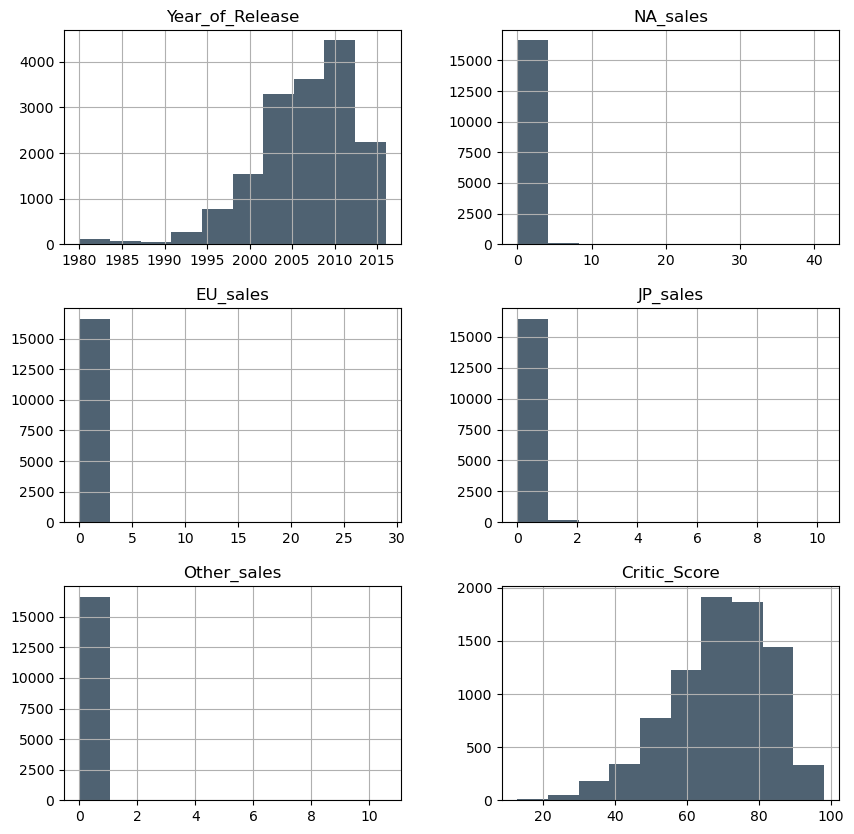

In [8]:
#строим графики для численных значений
data.hist(figsize=(10, 10), color = colors[0] );

In [9]:
data.isna().sum().to_frame()

,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
NA_sales,0
EU_sales,0
JP_sales,0
Other_sales,0
Critic_Score,8578
User_Score,6701


 В ходе первичного анализа данных выявилось следующее: 
        
* необходимо изменить тип данных в некоторых категориях. 
* необходимо далее обработать пропуски 
* текущий df включает в себя 10 столбцов и 16715 строчек.
* рассматриваемый период с 1980 по 2016


## Предобработка данных

### Приводим названия столбцов к нижнему регистру

In [10]:
# Приводим названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Заменяем тип данных и работаем с пропусками 

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)!

In [11]:
#изучаем тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [12]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Работа со столбцами "Год релиза", "Пользовательская оценка"

In [13]:
data.shape

(16715, 11)

In [14]:
# для изменения типа данных необходимо очистить пропуски 
data = data.dropna(subset=['year_of_release'])
data['year_of_release'] = np.ceil(data['year_of_release']).astype('int64')

In [15]:
data.shape

(16446, 11)

Пропуски возникли в некоторых случаях, т к игра содержит в себе год выпуска. Иные пропуски могли возникнуть, тк выпускались на разных платформах.  

In [16]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [17]:
# заменяем 'tbd' на nan, так как данная аббревиатура обозначает: значение не определено
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [18]:
# Приводим рейтинг к вещественным значениям 
data['user_score'] = data['user_score'].astype('float64') 

#### Работа с пропусками в столбцах "Наименование"

In [19]:
# работаем с иными пропусками 
data.isna().sum().to_frame()

,0
name,2
platform,0
year_of_release,0
genre,2
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8463
user_score,8983


In [20]:
# Строки без имени удаляем 
data = data.dropna(subset=['name'])

In [21]:
# удалим строки без жанра. таких пропуска всего 2, поэтоу этими данными можно пренебречь
data = data.dropna(subset=['genre'])

#### Работа с данными в столбце "Рейтинг"

In [22]:
data[data['rating'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [23]:
data['rating'].value_counts(dropna=False).to_frame()

,rating
NaN,6676
E,3921
T,2905
M,1536
E10+,1393
EC,8
K-A,3
AO,1
RP,1


In [24]:
# смотрим уникальные значения
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [25]:
# производим замену. «K-A» («Kids to Adults»)— Этот рейтинг был заменён на «Everyone»
data['rating'] = data['rating'].replace('K-A', 'E')

In [26]:
# заменим пропуски на значение tbd - ожидает рейтинга. Таким образом мы избавимся от пропусков.
data.loc[data['rating'].isna(), 'rating'] = 'tbd'
data.loc[data['rating']=='RP', 'rating'] = 'tbd'

In [27]:
#объединим рейтинг ЕС с Е
data['rating'] = data['rating'].replace('EC', 'E')

In [28]:
# игры c рейтингом А(18+) уберём из наших данных. Такая игра только одна, но добавлять к 17+ не стоит
data = data[data['rating'] != 'AO']

In [29]:
data['rating'].value_counts(dropna = False).to_frame()

,rating
tbd,6677
E,3932
T,2905
M,1536
E10+,1393


#### Работа с данными в иных столбцах

In [30]:
#Оставляем без изменений
data['platform'].value_counts().to_frame()

,platform
PS2,2127
DS,2121
PS3,1306
Wii,1286
X360,1232
PSP,1193
PS,1190
PC,957
GBA,811
XB,802


In [31]:
sorted(data['year_of_release'].unique())

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

In [32]:
# аномальные значения отсутствуют
sorted(data['critic_score'].unique())

[13.0,
 17.0,
 19.0,
 20.0,
 21.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 57.0,
 63.0,
 65.0,
 69.0,
 76.0,
 nan,
 49.0,
 56.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 64.0,
 66.0,
 67.0,
 68.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0]

In [33]:
# аномальных значений нет
sorted(data['user_score'].unique())

[8.0,
 nan,
 0.0,
 0.2,
 0.3,
 0.5,
 0.6,
 0.7,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 5.1,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 5.7,
 5.8,
 5.9,
 6.0,
 6.1,
 6.2,
 6.3,
 6.4,
 6.5,
 6.6,
 6.7,
 6.8,
 6.9,
 7.0,
 7.1,
 7.2,
 7.3,
 7.4,
 7.5,
 7.6,
 7.7,
 7.8,
 7.9,
 8.1,
 8.2,
 8.3,
 8.4,
 8.5,
 8.6,
 8.7,
 8.8,
 8.9,
 9.0,
 9.1,
 9.2,
 9.3,
 9.4,
 9.5,
 9.6,
 9.7]

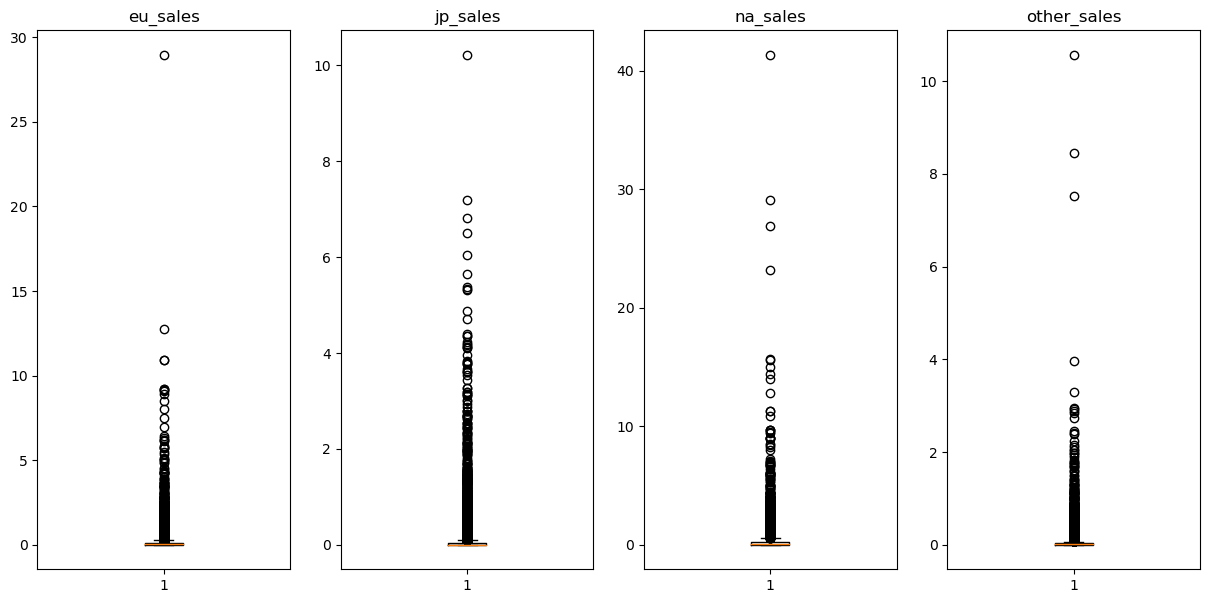

In [34]:
# изучаем, нет ли аномальных значений
fig, (axes) = plt.subplots(1, 4, figsize=(15, 7))
axes[0].boxplot(data = data, x = 'eu_sales')
axes[0].set_title("eu_sales")
axes[1].boxplot(data = data, x = 'jp_sales')
axes[1].set_title("jp_sales")
axes[2].boxplot(data = data, x = 'na_sales')
axes[2].set_title("na_sales")
axes[3].boxplot(data = data, x = 'other_sales')
axes[3].set_title("other_sales")
plt.show()

Отрицательные значения отсутствуют, присутствуют успешные проекты, но их  мы не убираем, т к необходимо понять их природу. На Японском и друхих рынках продажи значительно ниже.

In [35]:
data.shape

(16443, 11)

In [36]:
# удаляем явные дубликаты, если они есть
data = data.drop_duplicates().reset_index(drop=True)

In [37]:
data.shape

(16443, 11)

In [38]:
data[data.duplicated(['name', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1573,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
11533,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
15968,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [39]:
data[data.duplicated(['name', 'platform'], keep='last')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1176,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
5882,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T


Игра 2012 года является перезапуском Need for Speed: Most Wanted 2005 года. Поэтому данные игры не являются дубликатами.


In [40]:
data.shape

(16443, 11)

In [41]:
data = data.drop(index = 15968 ).reset_index(drop=True)

In [42]:
data.shape

(16442, 11)

Были выявлен неявный дубликат и удален. 

In [43]:
# проверяем, где остались пропуски
data.isna().sum().to_frame()

,0
name,0
platform,0
year_of_release,0
genre,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8461
user_score,8981


Пропуски в оценке оставим без изменений, иначе будут искажены показатели.
Данные, которые составляли малую часть были удалены, т к их анализ был бы затруднён(например, игры c рейтингом А(18+)).
Пропуски в строках были заменены на tbd.

In [44]:
# создаём столбец с суммарными продажами по регионам
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns') 

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16442 entries, 0 to 16441
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     7981 non-null   float64
 9   user_score       7461 non-null   float64
 10  rating           16442 non-null  object 
 11  sum_sales        16442 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [46]:
# анализируем, какое количество данных было утеряно в рамках обработки.
data.shape[0]/old_count_row*100

98.36673646425366

Данные на текущий момент обработаны. Аномалии отсутсвуют. Наблюдаются отклонения в продажах по разным регионам, однако, т к данные значения присутсвут, мы их оставляем для анализа. 
Значение tbd в оценке пользователей рассматривается. 
В ходе обработки данных было убрано менее 2-х %, что допустимо.

## Исследовательский анализ данных

### Количество выпущенных игр по годам

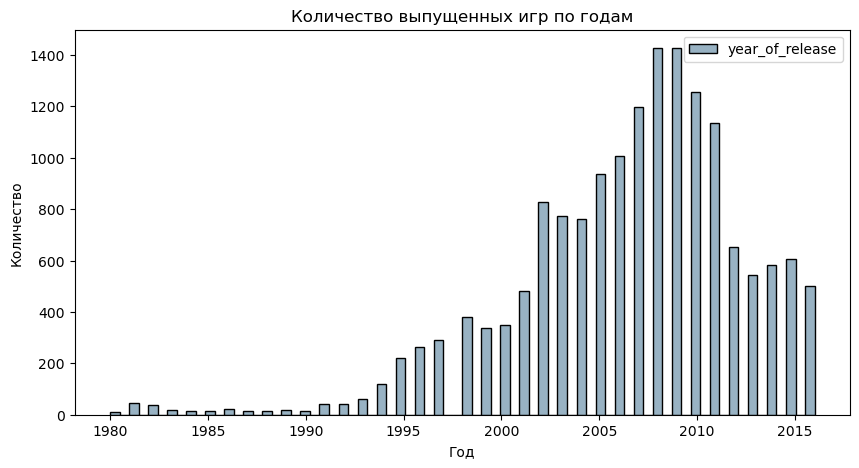

In [47]:
data.plot(y='year_of_release',  kind = 'hist',color=colors[1], edgecolor="black", bins=74, figsize = (10,5));
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год' )
plt.ylabel('Количество');

До 95 года количество игр не превышало 200 в год, данее данный показатель начал резко расти. в 2008 и 2009 было выпушенно самое большое количество игр. В 2013-2014 годах наблюдается спад, что может объясняться мировым экономическим кризисом. Данные до 2013-х годов не следует использовать для анализа.

### Продажи взависимости от платформы

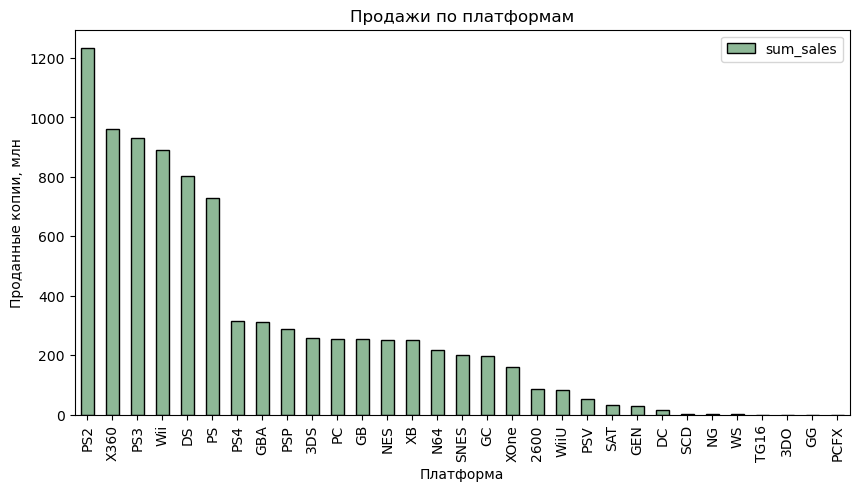

In [48]:
# Данные по платформам, отсортированные по сумме продаж 
platform_pivot = data.pivot_table(index = ['platform'], values = 'sum_sales', aggfunc = ['sum'])
platform_pivot.columns = ['sum_sales']
platform_pivot = platform_pivot.sort_values( by = 'sum_sales', ascending = False)

platform_pivot.plot( kind= 'bar', y='sum_sales', color=colors[4], edgecolor="black", figsize = (10,5))
plt.title('Продажи по платформам')
plt.xlabel('Платформа' )
plt.ylabel('Проданные копии, млн');

6 из представленных в данных платформ продали значительно больше копий, чем иные.

In [49]:
# выбираю платформы с самыми большими продажами
top_platform = list(platform_pivot.head(5).index)

In [50]:
# Готовим данные для анализа 
top_data = data.query('platform in @top_platform and year_of_release>1995')
platform_pivot_top = top_data.pivot_table(
    index = ['year_of_release'], 
    columns=['platform'], 
    values = 'sum_sales', 
    aggfunc = ['sum'])
platform_pivot_top.tail()

sum                          
platform            DS PS2     PS3    Wii   X360
year_of_release                                 
2012             11.01 NaN  107.35  21.71  99.74
2013              1.54 NaN  113.25   8.59  88.58
2014               NaN NaN   47.76   3.75  34.74
2015               NaN NaN   16.82   1.14  11.96
2016               NaN NaN    3.60   0.18   1.52

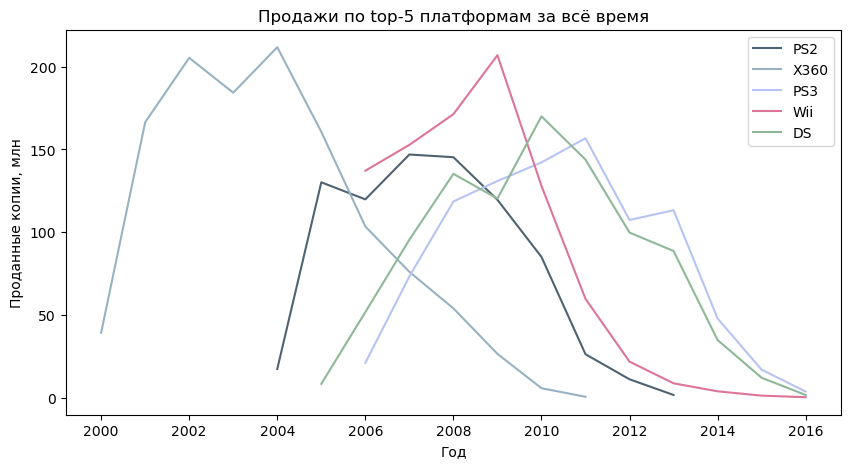

In [51]:
platform_pivot_top.plot(figsize = (10,5), color = colors)
plt.title('Продажи по top-5 платформам за всё время')
plt.xlabel('Год' )
plt.legend (top_platform)
plt.ylabel('Проданные копии, млн');

На основе данных можно слелать предположение, что срок платформы составляет примерно 10 лет. За первые 5 лет платформы добираются до пика, следующие 5 лет - "затихают" и уходят с рынка.

### Определение актуального периода

Определим актуальный период с 2014 года включительно. В связи с тем, что сильно развивается индустрия брать более старые данные рисковано для анализа.  До 2014 года наблюдается спад по продажам

In [52]:
# Создаем датафрейм с актуальным периодом от 2013 года
new_df = data.query('year_of_release>=2014')

In [53]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16441
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  sum_sales        1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


Для анализа осталось 1689 строк.

In [54]:
new_df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
count,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,718.000000,888.000000,1689.000000
mean,2014.953227,0.168182,0.160261,0.055115,0.048324,72.306407,6.623536,0.431883
std,0.799624,0.446134,0.466846,0.211513,0.141790,12.213500,1.589792,1.056109
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2015.000000,0.020000,0.020000,0.010000,0.010000,74.000000,7.000000,0.100000
75%,2016.000000,0.120000,0.120000,0.040000,0.040000,81.000000,7.800000,0.350000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,14.630000


### Анализ платформ, продаж за актуальные периоды

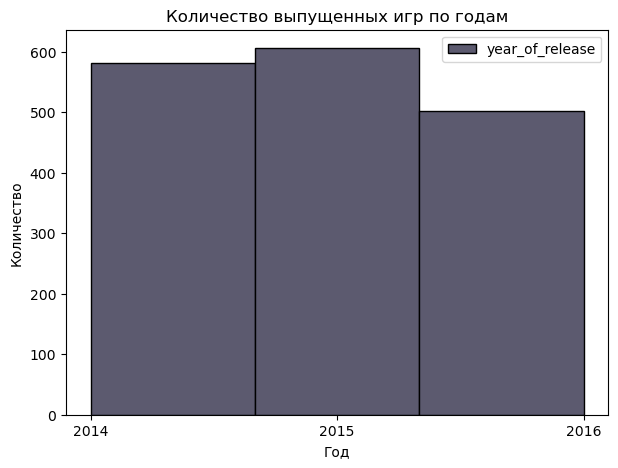

In [55]:
# создаем сводную таблицу для анализа
new_df.plot(y='year_of_release', kind = 'hist', color=colors[6], edgecolor="black", bins=3, figsize = (7,5));
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год' )
plt.ylabel('Количество')
plt.xticks([2014, 2015, 2016])
plt.show();

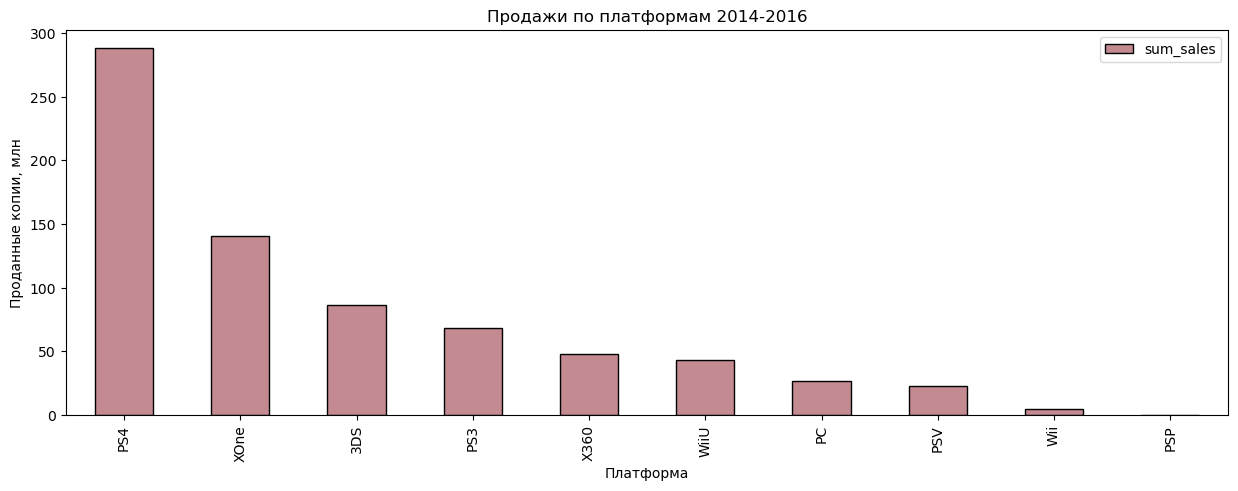

In [56]:

# Данные по платформам, отсортированные по сумме продаж 
platform_pivot_new = new_df.pivot_table(index = ['platform'], values = 'sum_sales', aggfunc = ['sum'])
platform_pivot_new.columns = ['sum_sales']
platform_pivot_new = platform_pivot_new.sort_values( by = 'sum_sales', ascending = False)

platform_pivot_new.plot( kind= 'bar', y='sum_sales', color=colors[7], edgecolor="black", figsize = (15,5))
plt.title('Продажи по платформам 2014-2016')
plt.xlabel('Платформа' )
plt.ylabel('Проданные копии, млн');

In [57]:
# выбираю платформы с самыми большими продажами
top_platform_new = list(platform_pivot_new.head(10).index)
top_platform_new

['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP']

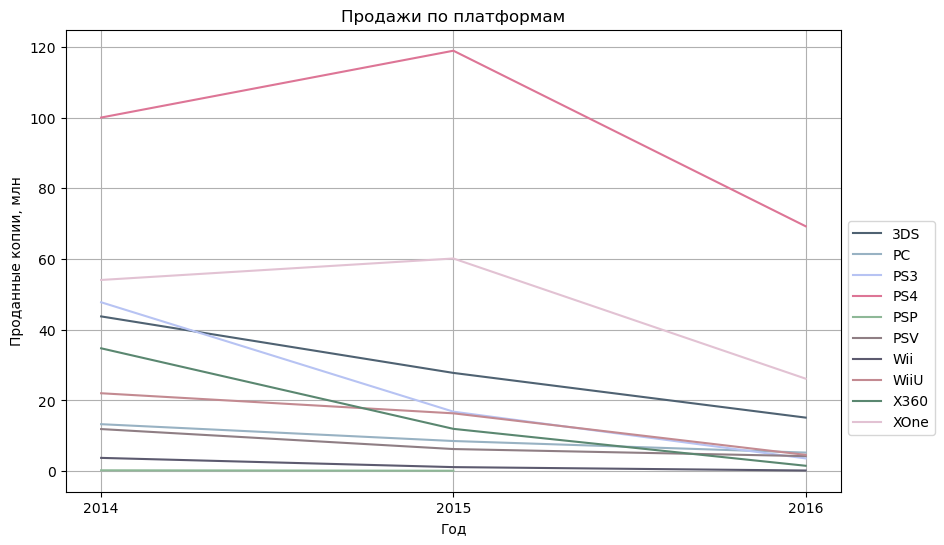

,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [58]:
# Готовим данные для анализа 
top_data_new = new_df.query('platform in @top_platform_new and year_of_release>1995')
platform_pivot_top_new = top_data_new.pivot_table(
    index = ['year_of_release'], columns=['platform'], values = 'sum_sales', aggfunc = ['sum']
)
platform_pivot_top_new.columns = ['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']
                                               
platform_pivot_top_new.plot(figsize = (10,6), grid=True, color = colors)
plt.title('Продажи по платформам')
plt.xlabel('Год' )
plt.ylabel('Проданные копии, млн')
plt.xticks([2014, 2015, 2016])
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show();
platform_pivot_top_new

In [59]:
# создаём сводную таблицу, более удобную для анализа 
platform_pivot_top_new_T = top_data_new.pivot_table(
    index = ['platform'], columns=['year_of_release'], values = 'sum_sales', aggfunc = ['sum']
)

platform_pivot_top_new_T.columns = ['2014', '2015', '2016']
platform_pivot_top_new_T['total'] = platform_pivot_top_new_T['2014'] + platform_pivot_top_new_T['2015'] + platform_pivot_top_new_T['2016']
platform_pivot_top_new_T = platform_pivot_top_new_T.sort_values(by=('total'), ascending = False)
platform_pivot_top_new_T

,2014,2015,2016,total
platform,,,,
PS4,100.00,118.90,69.25,288.15
XOne,54.07,60.14,26.15,140.36
3DS,43.76,27.78,15.14,86.68
PS3,47.76,16.82,3.60,68.18
X360,34.74,11.96,1.52,48.22
WiiU,22.03,16.35,4.60,42.98
PC,13.28,8.52,5.25,27.05
PSV,11.90,6.25,4.25,22.40
Wii,3.75,1.14,0.18,5.07


Для анализа остались 10 платформ, в PSP в 2016 году уже не было игр. В связи с этим необходимо исключить данную платфору. Как и говорилось ранее, рынок сильно меняется.

* PS4 вышла взамен PS3 в 2014 году, в связи с чем наблюдается значительное  падение прибыли на игры для PS3.
* В целом по рынку наблюдается значительное снижение прибыли. 
* Топ-3 платформ по прибыли: PS4, XOne, 3DS. Они же основные конкуренты на рынке. 

In [60]:
# удаляем платформу, которая больше не актуальна 
# формируем топ 5 платформ, которые были выбраны для дальнейшего анализа
new_df = new_df.loc[new_df['platform'] != 'PSP']
top_5 = list(platform_pivot_top_new_T.head(5).index)
top_df =  new_df.query('platform in @top_5')
top_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,tbd,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,tbd,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,tbd,7.98


In [61]:
new_df['platform'].value_counts().to_frame()

,platform
PS4,376
PSV,295
XOne,228
PS3,219
3DS,212
PC,151
X360,111
WiiU,73
Wii,11


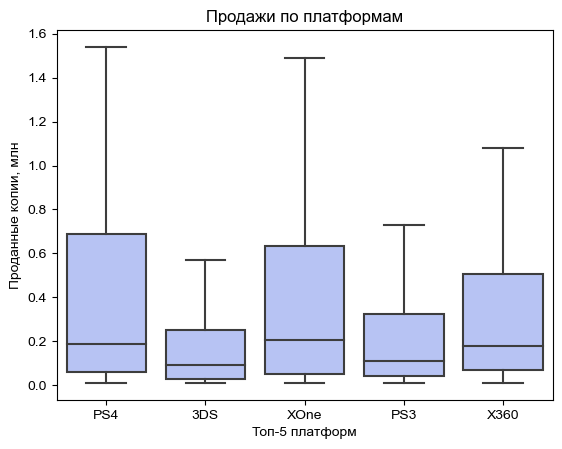

In [62]:
# изучаем средние показатели по платформам
sns.boxplot(data=top_df, x="platform", y="sum_sales",
    showfliers = False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (colors[2])},
           );
sns.set(rc={'figure.figsize':(10,10)})
plt.title('Продажи по платформам')
plt.xlabel('Топ-5 платформ' )
plt.ylabel('Проданные копии, млн')

plt.show();

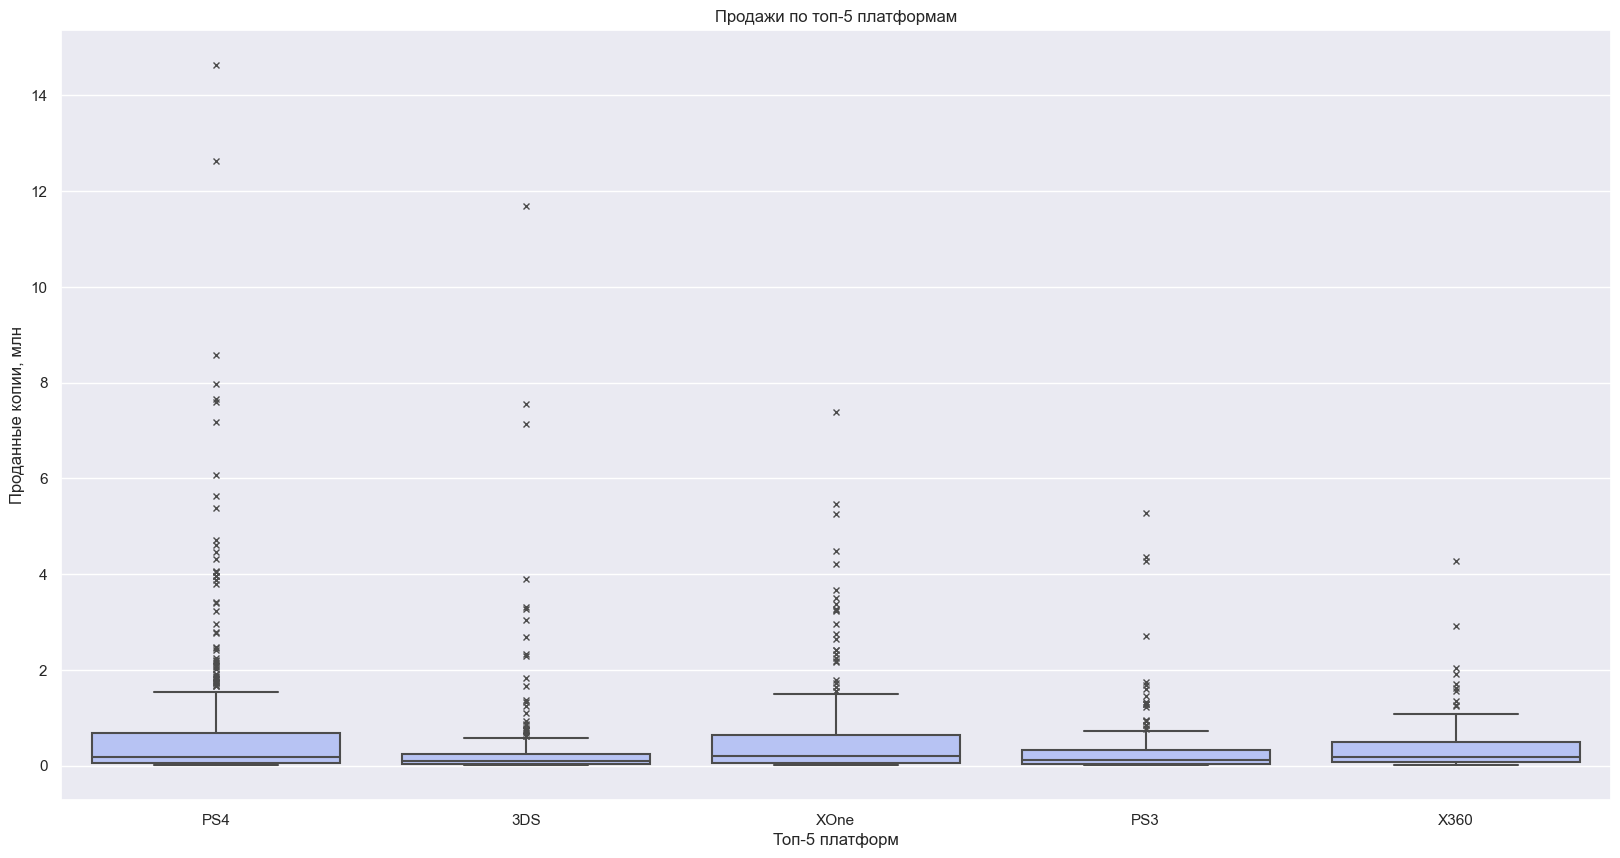

In [63]:
# изучаем средние показатели по платформам
plt.figure(figsize=(20,10))
sns.boxplot(data=top_df, x="platform", y="sum_sales",
    flierprops={"marker": "x"},
    boxprops={"facecolor": (colors[2])},
           );
sns.set(rc={'figure.figsize':(20,10)})
plt.title('Продажи по топ-5 платформам')
plt.xlabel('Топ-5 платформ' )
plt.ylabel('Проданные копии, млн')

plt.show();

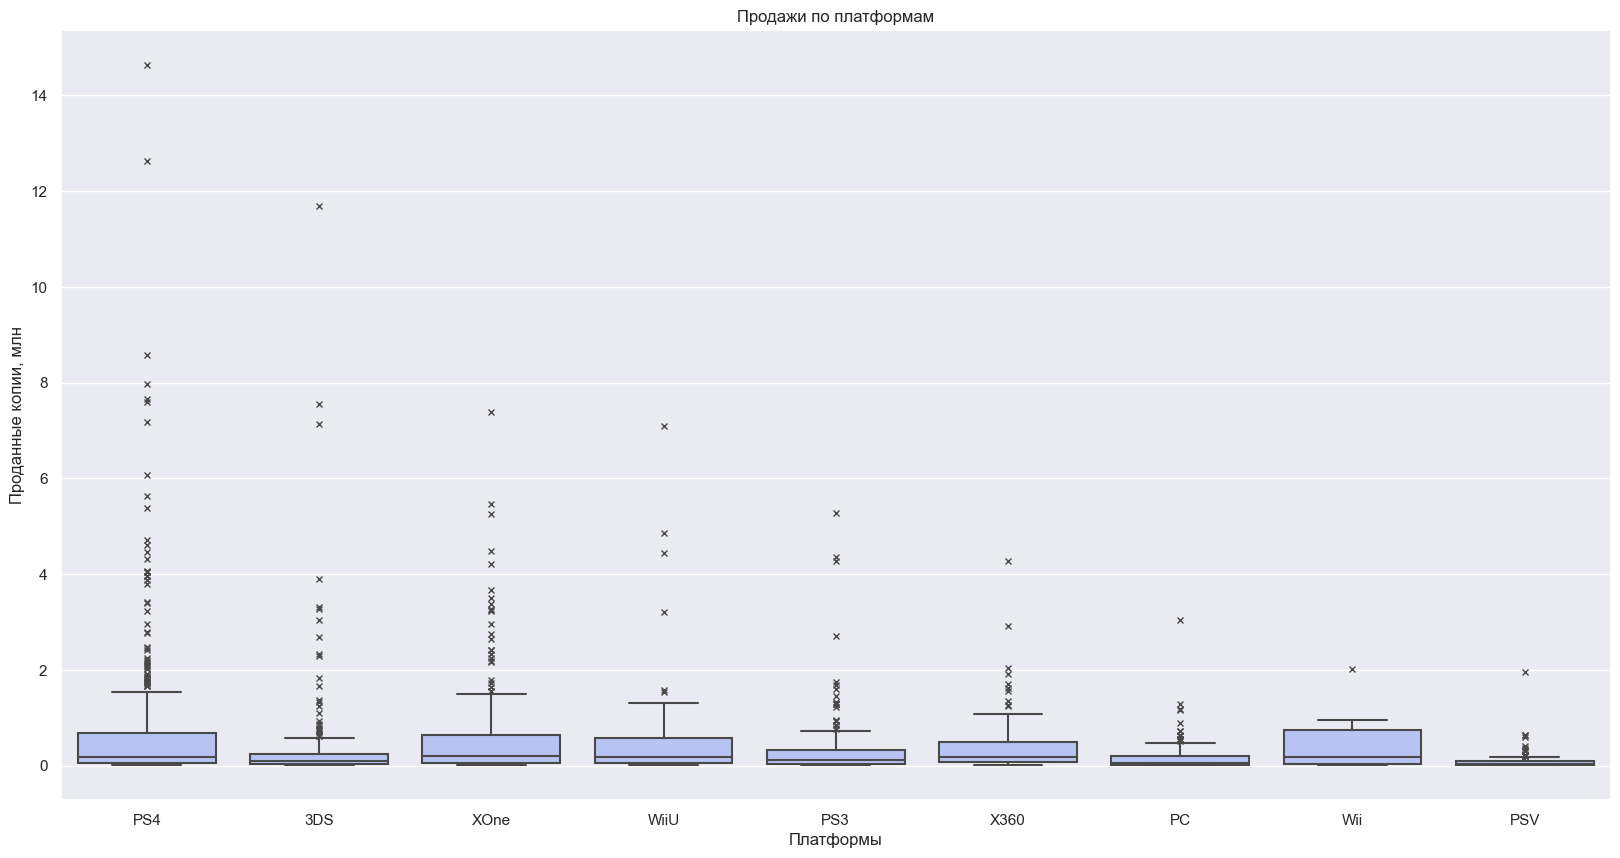

In [64]:
# изучаем аномальные значения
sns.boxplot(data=new_df, x="platform", y="sum_sales",
    #showfliers = False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": colors[2]},
           );
sns.set(rc={'figure.figsize':(20,10)})
plt.title('Продажи по платформам')
plt.xlabel('Платформы' )
plt.ylabel('Проданные копии, млн')

plt.show();

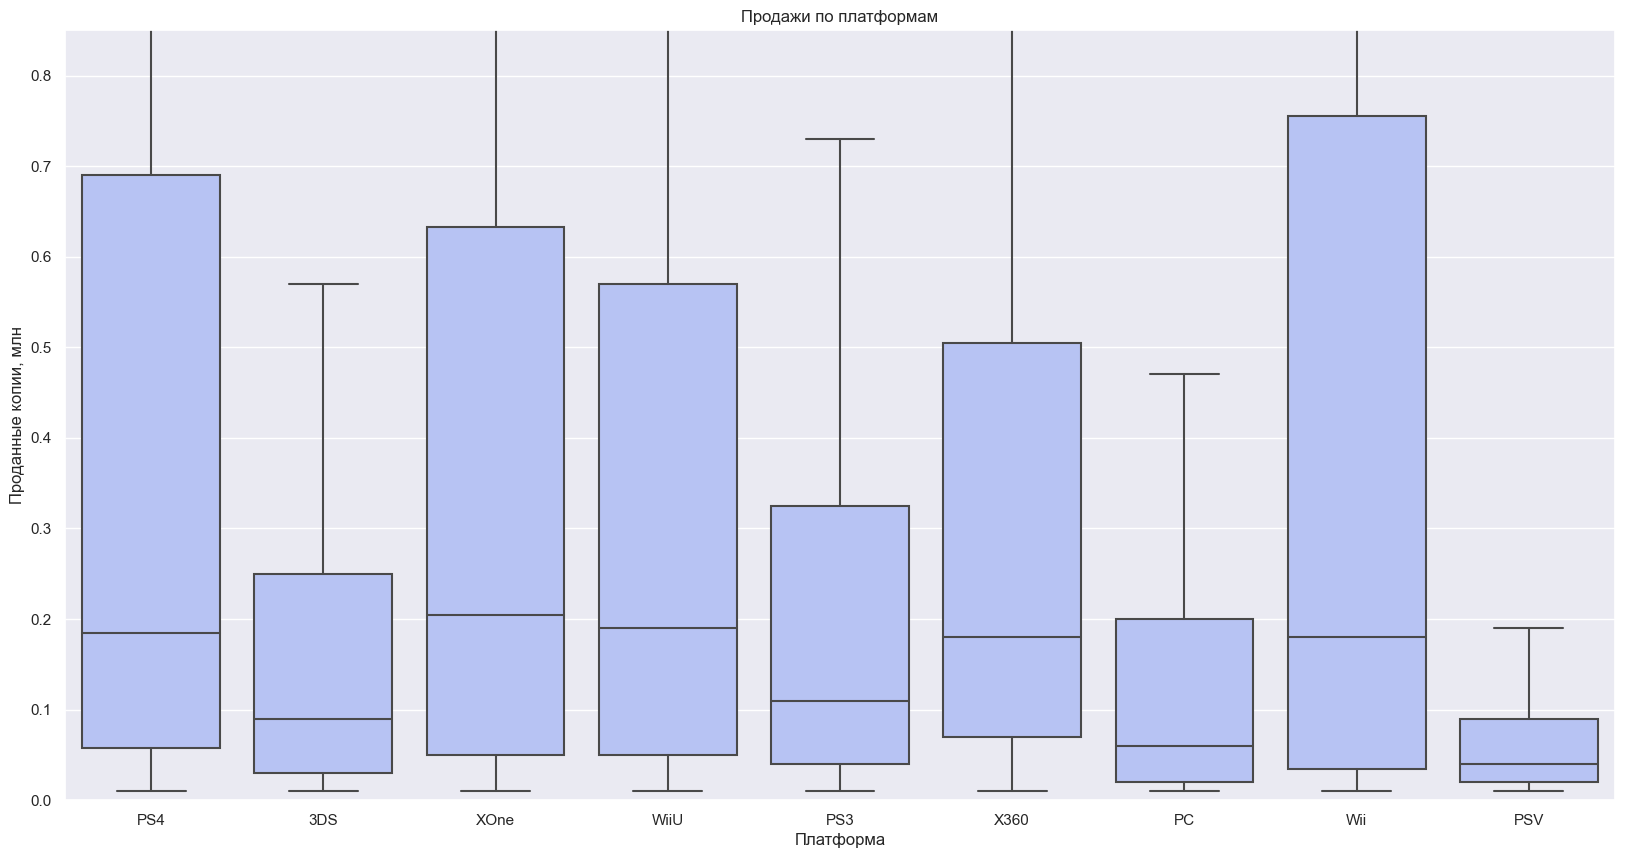

In [65]:
# смотрим без аномалий 9 платформ
sns.boxplot(data=new_df, x="platform", y="sum_sales",
    showfliers = False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": colors[2]},
           )
sns.set(rc={'figure.figsize':(20,10)})
plt.title('Продажи по платформам')
plt.xlabel('Платформа' )
plt.ylabel('Проданные копии, млн')
plt.ylim(0, 0.85)
plt.show();

* PS4 и XOne являются основыными конкурентами на рынке приставок. Медианные значения у них примерно одинаковые. Однако у PS4 чаще наблюдаются игры, которые сильно лидируют по продажам.
* К разряду стабильно хороших игр можно отнести WiiU, Wii, X360. Однако они отличаются небольшим количесвтом игр, которые "выстрелили". Зато делают стабильно средние игры.
* 3DS чаще всего делает игры ниже среднего, однако наблюдаются и успешные проекты, что позволяет данной платформе войти в топ по продажам. 
* Хуже всего продаются игры на ПК и PSV. Продукты на данные консоли не переходили рубеж в 4 млн.
* Иные продукты находятся на стабильно среднем уровне. 
* У платформ 3DS, PC, PCV медианное значение находится ниже 0,1 млн, что в более 2 раза меньше, чем у XONe.

### Влияние отзывов на продажи 

Для анализа влияния отзывов на прожажи будет выбрана самая популярная платформа - PS4.

In [66]:
# отбираем данные только для PS4
df_ps4 = new_df.loc[new_df['platform']== 'PS4']
df_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,tbd,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,tbd,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16228,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,tbd,0.01
16231,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,tbd,0.01
16253,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16257,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


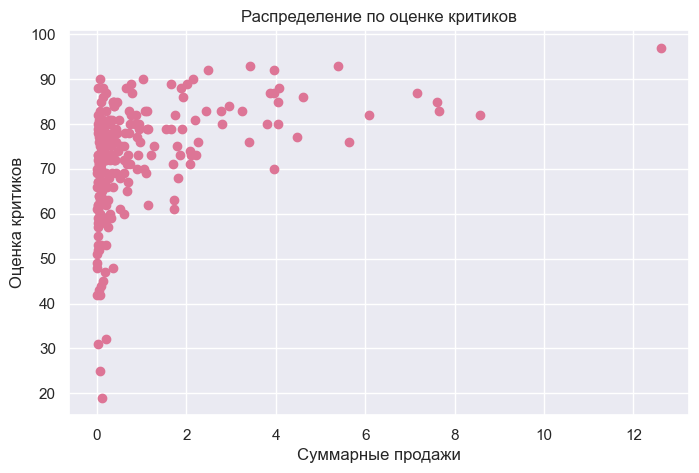

In [67]:
# Строим диаграмму рассеяния для оценки критиков и продаж
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x = df_ps4['sum_sales'], y = df_ps4['critic_score'], color = colors[3])
plt.xlabel("Суммарные продажи")
plt.ylabel("Оценка критиков")
plt.title('Распределение по оценке критиков');


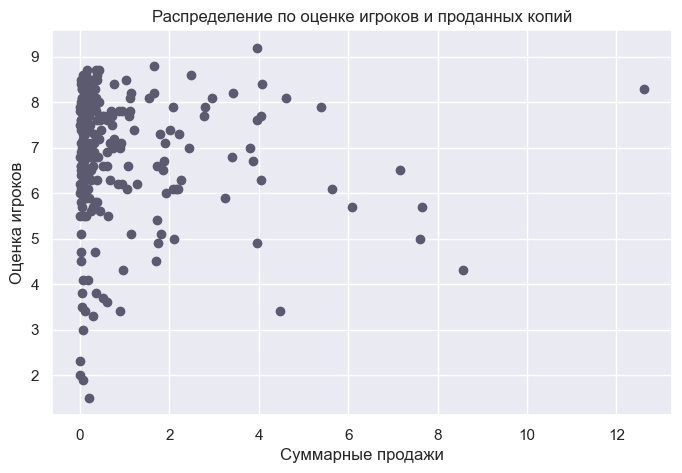

In [68]:
# Строим диаграмму рассеяния для оценки пользователей и продаж
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x = df_ps4['sum_sales'], y = df_ps4['user_score'], color = colors[6])
plt.xlabel("Суммарные продажи")
plt.ylabel("Оценка игроков")
plt.title('Распределение по оценке игроков и проданных копий');

По первому графику распределения видно, что не все хорошо оценённые игры(70 баллов и выше) продали более 2-х млн копий. Однако только высоко оценённые игры(70+) перешли рубеж в 2 млн. 
Среди игр значительно выделяется одна(Grand Theft Auto V). Она оценена высоко критиками, почти 100 б. и продано 12.62. 
В данном анализе необходимо учесть, что не все игры имеют рейтинг.
Далее рассмотрим график распределения по оценке пользователей. На нём менее выражена зависимость от рейтинга. Однако с совсем плохм рейтингом(3 и меньше) игры не набрали даже 1 млн продаж. Далее наблюдается некая тенденция, что с увеличением рейтинга улучшаются продажи. Однако есть некоторые выбросы на средних рейтингах. 

In [69]:
# Изучаем данные по среднему значению 
other_platforms = top_df.pivot_table( 
         index = ['platform'],  
         values = ['user_score','critic_score', 'sum_sales'], 
         aggfunc = ['mean'] )
other_platforms.columns = ['user_score','critic_score', 'sum_sales']
other_platforms.sort_values(by = 'sum_sales')

,user_score,critic_score,sum_sales
platform,,,
X360,63.730769,0.434414,5.771084
PS3,66.555556,0.311324,6.014286
XOne,73.793548,0.615614,6.594545
PS4,72.164557,0.766356,6.828099
3DS,68.980392,0.408868,7.138182


In [70]:
# строим корреляционную таблицу для ps4
df_ps4[['user_score', 'critic_score', 'sum_sales']].corr()

,user_score,critic_score,sum_sales
user_score,1.000000,0.546434,-0.040132
critic_score,0.546434,1.000000,0.402661
sum_sales,-0.040132,0.402661,1.000000


In [71]:
top_df[top_df['platform']== 'XOne'][['user_score', 'critic_score', 'sum_sales']].corr()

,user_score,critic_score,sum_sales
user_score,1.000000,0.440977,-0.070384
critic_score,0.440977,1.000000,0.428677
sum_sales,-0.070384,0.428677,1.000000


In [72]:
top_df[top_df['platform']== '3DS'][['user_score', 'critic_score', 'sum_sales']].corr()

,user_score,critic_score,sum_sales
user_score,1.000000,0.862485,0.215193
critic_score,0.862485,1.000000,0.314117
sum_sales,0.215193,0.314117,1.000000


In [73]:
top_df[top_df['platform']== 'PS3'][['user_score', 'critic_score', 'sum_sales']].corr()

,user_score,critic_score,sum_sales
user_score,1.000000,0.693445,-0.166761
critic_score,0.693445,1.000000,0.446575
sum_sales,-0.166761,0.446575,1.000000


Оценка критиков и пользователей больше коррелируют в иных платформах, чем у PS4. Связь между оценкой критиков и продажами у PS4 на схожем уровне относително других платформ. У 3DS значительно слабже выражена данная связь.

### Изучение влияние жанров на продажи 

In [74]:
# смотрим распределение
new_df['genre'].value_counts().to_frame()

,genre
Action,613
Role-Playing,221
Adventure,181
Sports,160
Shooter,128
Misc,111
Racing,69
Fighting,60
Simulation,44
Platform,38


<AxesSubplot:>

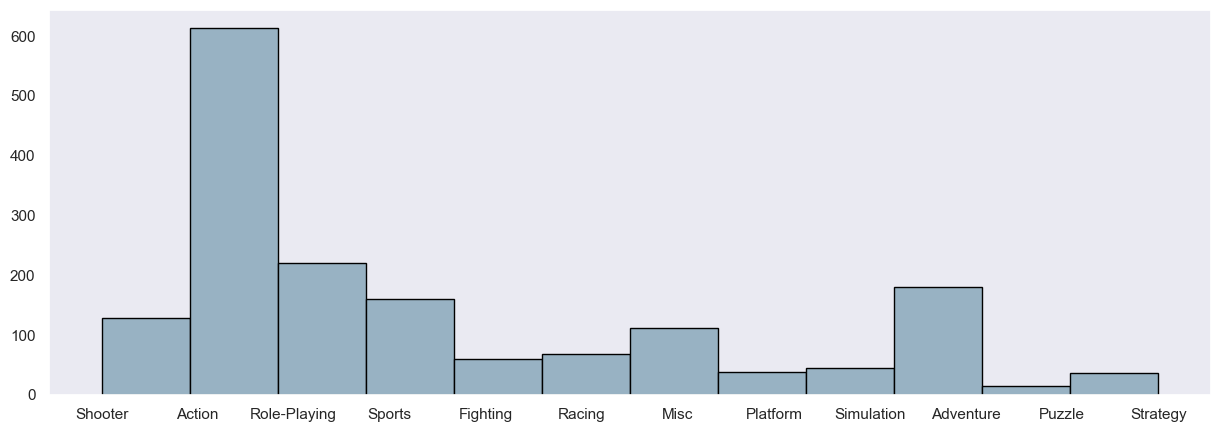

In [75]:
# смотрим распределение
new_df['genre'].hist(bins=12,color= colors[1], edgecolor="black", figsize = (15,5), grid = False)       

In [76]:

# для более наглядного результата берём медианное значение
pivot_genre = top_df.pivot_table( 
         index = ['genre'],  
         values = [ 'sum_sales'], 
         aggfunc = ['mean'] )
pivot_genre.columns = [ 'sum_sales']
pivot_genre = pivot_genre.sort_values(by = 'sum_sales', ascending = False);

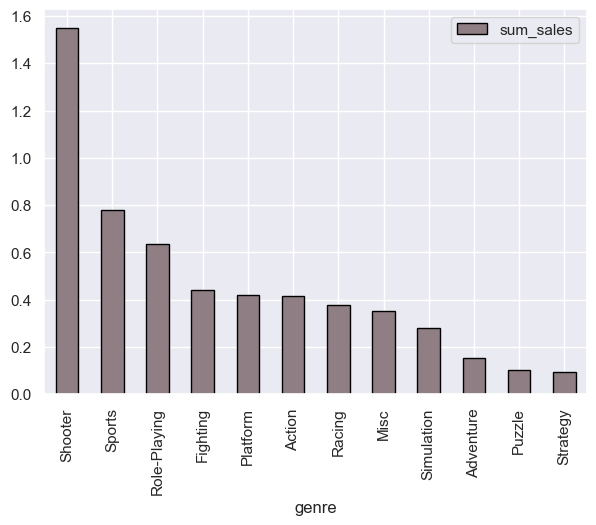

In [77]:
pivot_genre.plot( kind ='bar', figsize = (7,5), color = colors[5], edgecolor="black");

Самыми прибыльными жанрами являются игры Shooter, Sports, Role-Playing - эти жанры отличаются быстрой сменой картинки, действия больше инстинктивные. Игры с низкими продажами, такие как стратегии, пазлы - это более спокойные игры, требующие напряжения мозга. Жанр оказывает большое влияние на продажи. 
Action игры действительно оказались "раздутыми". При взятии медианного значения данные игры ушли на 6 место с первого. Данный факт действительно говорит о том, что большие продажи возникли из-за количества, а не из-за качества проектов. 

Таким образом, важными факторами для продажи является платформа, на которую выпускается игра, а также жанр игры. Мнение пользователей не стоит использовать, как критерий для формирвания прогноза, а мнение критиков можно взять как второстепенный фактор.

## Портрет пользователя

In [78]:
# пишем функцию, чтобы по параметру рассчитывать аналогичные данные
def portret_user( parametr):
    list_reg = ['na_sales', 'eu_sales', 'jp_sales']
    
    for region in list_reg:
        summa = sum(new_df[region])
        user_parametr = new_df.pivot_table(index= parametr, values = [region], aggfunc = ['sum'])
        user_parametr.columns = [region]
        sum(user_parametr[region])
        user_parametr = user_parametr.sort_values(by= region, ascending = False).head(5)
        user_parametr['part, %']= round(user_parametr[region]/summa*100, 2)
        print(' ')
        print(user_parametr)
    fig, axes = plt.subplots(1, 3, figsize=(15, 3))        
    for i in range(len(list_reg)):
        user_portret = new_df.pivot_table(index= parametr, values = [list_reg[i]], aggfunc = ['sum'])
        user_portret.columns = [list_reg[i]]
        user_portret = user_portret.sort_values(by= list_reg[i], ascending = False).head(5)
        x = list(user_portret.index)
        y = user_portret[list_reg[i]]
        axes[i].bar(x, y, color = colors)
        axes[i].set_title(list_reg[i])
    

 
              na_sales  part, %
genre                          
Shooter          79.02    27.82
Action           72.53    25.53
Sports           46.13    16.24
Role-Playing     33.47    11.78
Misc             15.05     5.30
 
              eu_sales  part, %
genre                          
Action           74.68    27.59
Shooter          65.52    24.21
Sports           45.73    16.89
Role-Playing     28.17    10.41
Racing           14.13     5.22
 
              jp_sales  part, %
genre                          
Role-Playing     31.16    33.60
Action           29.38    31.68
Fighting          6.37     6.87
Misc              5.59     6.03
Shooter           4.87     5.25


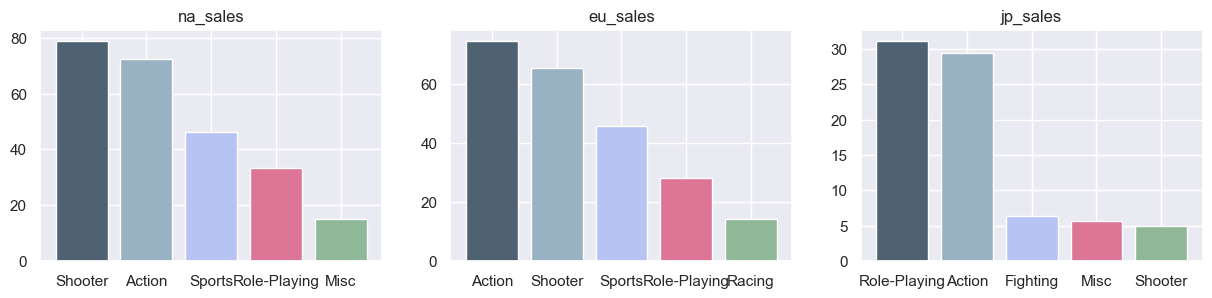

In [79]:
portret_user('genre')

В Америке 28% игр - Shooter, далее идут Action - 26%, Sports - уже на 9% меньше и составляют около 17% рынка.
В Европе Action - 28% , Shooter - 24%, Sports также на третьем месте с отставанием уже в 7%.
В Японии самыми популярными являются Role-Playing игры, они занимают 34% рынка. Чуть ниже Action, другие виды игр занимают менее 7% рынка. Шутеры не популярны в Японии.

 
          na_sales  part, %
platform                   
PS4          98.61    34.71
XOne         81.27    28.61
X360         28.30     9.96
3DS          22.64     7.97
PS3          22.05     7.76
 
          eu_sales  part, %
platform                   
PS4         130.04    48.04
XOne         46.25    17.09
PS3          25.54     9.44
PC           17.97     6.64
3DS          16.12     5.96
 
          jp_sales  part, %
platform                   
3DS          44.24    47.71
PS4          15.02    16.20
PSV          14.54    15.68
PS3          11.22    12.10
WiiU          7.31     7.88


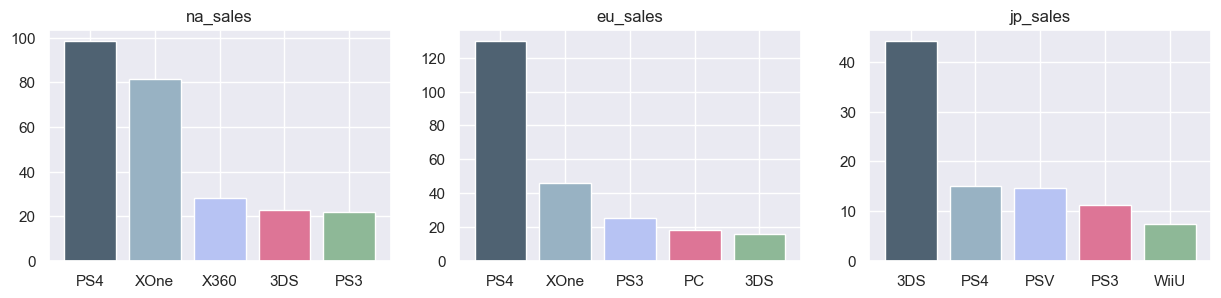

In [80]:
portret_user('platform')

В Европе преимущественно играют на PS4. Почти 50%. XOne выбирает меньше 20% игрооков. Иные платформы ещё меньше.
Для Америки свойственно иное распределение. PS4 занимает 35% рынка,XOne - 29%. В Америке действительно существует конкуренция данных двух платформ. Иные по значениям не привышают и 10%.
Япония отдаёт предпочтение 3DS в 48% случаев. Иные платформы занимают не более 17% рынка.

 
        na_sales  part, %
rating                   
M          96.42    33.94
tbd        64.72    22.78
E          50.74    17.86
T          38.95    13.71
E10+       33.23    11.70
 
        eu_sales  part, %
rating                   
M          93.44    34.52
tbd        58.95    21.78
E          58.06    21.45
T          34.07    12.59
E10+       26.16     9.66
 
        jp_sales  part, %
rating                   
tbd        56.54    60.97
T          14.78    15.94
E           8.94     9.64
M           8.01     8.64
E10+        4.46     4.81


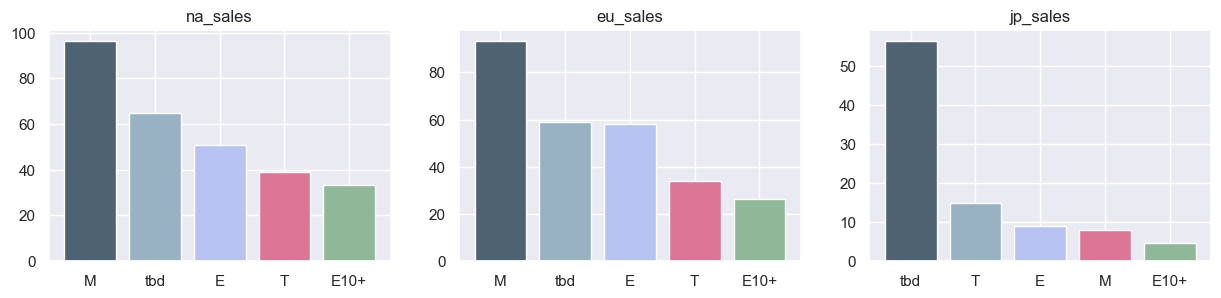

In [81]:
portret_user('rating')

Продажи в Северной Америке и Европе по рейтингам схожи, игроки предпочитают категорию «Для взрослых» в 34% случаев. Без категори игры на втором месте и составляют около 22%. "Для всех" - 17% и 22% соответственно.
Рынок Японии сильно отличается. 
Игры, в которые играет Япония чаще всего не имеет рейтинга(более 60%). Далее игры для подростков и составляют 15%


## Проверка гипотез

### Гипотезы

* H0 = Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* H1 = Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [82]:
alpha = 0.05
sample_1 = list(new_df.loc[new_df['platform'] == 'XOne' , 'user_score'])
sample_2 = list(new_df.loc[new_df['platform'] == 'PC' , 'user_score'])
results = st.ttest_ind(sample_1, sample_2, equal_var=False, nan_policy='omit')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.11601398086668943
Не получилось отвергнуть нулевую гипотезу


На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативы. 

* H0 = Средние пользовательские рейтинги жанров Action и Sports одинаковые.

* H1 = Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [83]:
alpha = 0.05
sample_3 = list(new_df.loc[new_df['genre'] == 'Action' , 'user_score'])
sample_4 = list(new_df.loc[new_df['genre'] == 'Sports' , 'user_score'])
results = st.ttest_ind(sample_3, sample_4, equal_var=False, nan_policy='omit')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.182555038264477e-14
Отвергаем нулевую гипотезу


На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы.

Использовалась гипотеза о равенстве средних двух генеральных совокупностей. Генеральные совокупности не зависят друг от друга. Можно предположить, что дисперсии у генеральных совокупностей разные, поэтому мы используем equal_var=False в обоих случаях.

Таким образом: 
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Средние пользовательские рейтинги жанров Action и Sports различаются.

## Общий вывод

*Целью* данного исследование является анализ рынка компьютерных игр с целью формирования стратегии на будущий 2017 год. 

Для анализа были отобраны данные *с 2014 года*. Такой выбор объясняется тем, что игровая индустрия, как и в целом цифровые технологии, на 2016 год развивались в значительном темпе. Предпочтения потребителей имеют определённую моду, котору не следует рассматривать в долгосрочном периоде. Таким образом, 2014, 2015 и 2016 года были проанализированы(для исследования остались 1689 строк) и сделаны нижеуказанные выводы.


* По критериям для анализа остались 9 платформ, но т. к необходимо ориентироваться на будущее, то оставляем только 5.
* На платформе PS4 встречаются наиболее часто успешные проекты. ХOne является основным конкурентом и показывает результаты хуже лидера данного рейтинга. Иные платформы находятся примерно на одном уровне и по продажам находятся ниже вышеуказанных двух. 
* При закупке игр ориентироваться только на отзывы потребителей не стоит. Не выявлена сильная положительная связь между оценкой и продажами. 
* Оценка критиков не должна быть определяющей, но прямопропорциональная средняя связь присутсвует. Игры с рейтингом критиков 70+ являются наиболее предпочтительными для покупки.
* Срок жизни платформы составляет в среднем 10 лет, первые 5 лет, они набирают обороты, оставшиеся 5 - затихают.
* По миру самыми прибыльными жанрами являются игры Shooter, Sports, Role-Playing. Низкоприбыльные - игры, где требуется подумать.

Предпочтения по регионам.
Для работы магазина необходимо учитывать рынок, на котором он работает. В разных регионах сложился свой портрет потребителя.

*Рынок Северной Америки*

Игроком Северной Америки является любитель игр с рейтингом "М"(34%) или без рейтинга(22%), в более редких случаях игры "Для всех". Он предпочитает игры, где есть быстрая смена картинки, движения, стрельба. Для него являются приоритетными игры Shooter(28%), Action(26%), Sports(17%). У игрока вероятнее всего PS4(35%) или XOne(29%). Данные приставки забирают 64% рынка.  

*Рынок Европы*

Каждый второй игрок Европы предпочитает PS4, каждый четвертый-XOne.  Европейцы предпочитают играть в Action(28%), Shooter(24%), Sports(17%). Игроки предпочитают категорию «М» в 34% случаев. Без категори игры на втором месте и составляют около 22%. "Е" 22% соответственно.

*Рынок Японии*

Каждый второй игрок Японии предпочитает 3DS. Иные платформы занимают не более 17% рынка. Японец предпочитает Role-Playing(34%) или Action(32%). Шутеры не популярны в Японии.